# MSBD 566 - Lecture 9
## Clustering - IMAGES

We will focus today on clustering similar shapes in an image

In [2]:
# import modules
#%pip install scikit-image # uncomment this line if scikit-image is not installed
#%pip install opencv-python # uncomment this line if cv2 is not installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from skimage.data import coins
import cv2

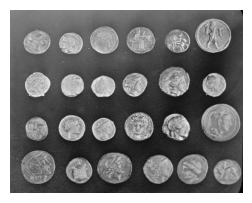

Size of image: (303, 384, 3)


In [3]:
originalcoins = coins()
originalcoins = cv2.cvtColor(originalcoins, cv2.COLOR_BGR2RGB) # don't really need this step since the image is grayscale

# view the image
plt.figure(figsize=(3, 3))
plt.imshow(originalcoins)
plt.axis('off')
plt.show()

# print image shape
print(f"Size of image: {originalcoins.shape}")

## Pre-processing images

For images, it is crucial to clean the images to remove noises and reduce artifacts

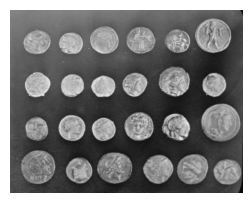

Size of image: (303, 384, 3)


In [4]:
# denoising image using Gaussian Filter 
from skimage.filters import gaussian
denoisedcoins = gaussian(originalcoins, sigma=0.5)

# view the denoised image
plt.figure(figsize=(3, 3))
plt.imshow(denoisedcoins, cmap='gray')
plt.axis('off')
plt.show()

# print image shape
print(f"Size of image: {denoisedcoins.shape}")

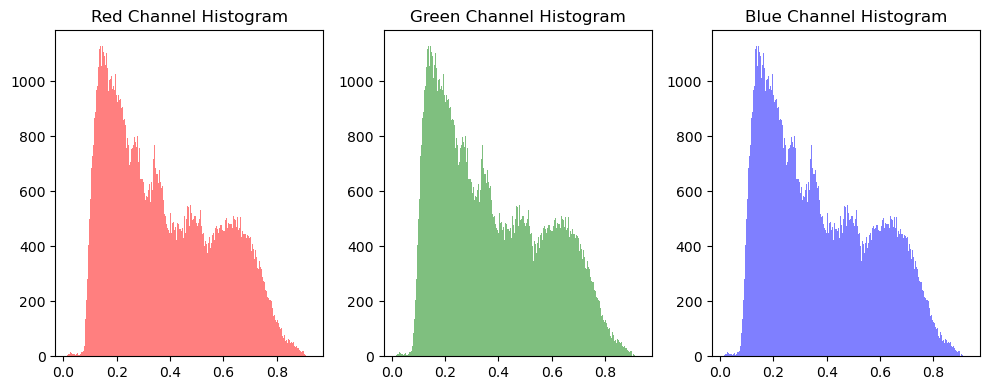

In [5]:
# View the histogram of the image in separate subplots
r = denoisedcoins[:,:,0].flatten()
g = denoisedcoins[:,:,1].flatten()
b = denoisedcoins[:,:,2].flatten()
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(r, bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.subplot(1, 3, 2)
plt.hist(g, bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.subplot(1, 3, 3)
plt.hist(b, bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.tight_layout()
plt.show()

## Question for thought: Why are the histogram looks similar in all colors?


### Clustering the image



In [6]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = denoisedcoins.reshape(-1, 3)
print(f"Reshaped image to pixels array of shape: {pixels.shape}")

Reshaped image to pixels array of shape: (116352, 3)


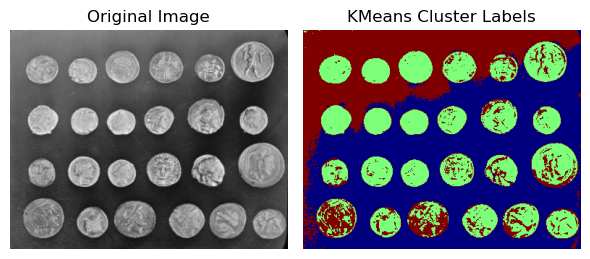

In [7]:
# Clustering using kMeans

# Number of clusters
n_clusters = 3

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmean_labels = kmeans.fit_predict(pixels)
kmean_centers = kmeans.cluster_centers_

# Reshape the clustered labels back to the original image shape
k_segmented_image = kmean_centers[kmean_labels].reshape(denoisedcoins.shape)
kmeanlabels_img = kmean_labels.reshape(denoisedcoins.shape[0], denoisedcoins.shape[1])

# View the clustered image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(denoisedcoins, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(kmeanlabels_img, cmap='jet')
plt.title('KMeans Cluster Labels')
plt.axis('off')
plt.tight_layout()
plt.show()

Estimated bandwidth for Mean Shift: 0.13200979628029688
Number of clusters found by Mean Shift: 3


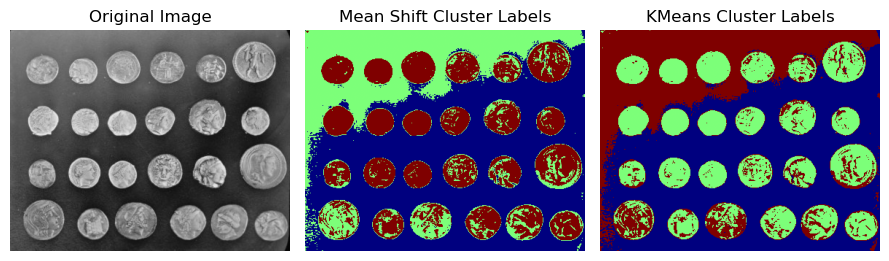

In [8]:
# Clustering the image using Mean Shift
from sklearn.cluster import estimate_bandwidth, MeanShift

# Estimate the bandwidth for Mean Shift
bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=500)
print(f"Estimated bandwidth for Mean Shift: {bandwidth}")

# Set up Mean Shift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_labels = meanshift.fit_predict(pixels)
ms_centers = meanshift.cluster_centers_
print(f"Number of clusters found by Mean Shift: {len(np.unique(ms_labels))}")

# Reshape the clustered labels back to the original image shape
ms_segmented_image = ms_centers[ms_labels].reshape(denoisedcoins.shape)
mslabels_img = ms_labels.reshape(denoisedcoins.shape[0], denoisedcoins.shape[1])

# View the clustered image
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(denoisedcoins, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mslabels_img, cmap='jet')
plt.title('Mean Shift Cluster Labels')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(kmeanlabels_img, cmap='jet')
plt.title('KMeans Cluster Labels')
plt.axis('off')
plt.tight_layout()
plt.show()

## Activity: Try using an image of your own and using different methods.

For the beginning, choose an image that is easily to segment (even by your eyes).